In [12]:
import numpy as np 
import pandas as pd 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [14]:
#Data Preprocessing
print(os.listdir("./input")) #without extracting the data.rar file

['.ipynb_checkpoints', 'extracted_images']


In [15]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)

data_path='./input/extracted_images'
train_set = train_datagen.flow_from_directory(
    data_path, 
    target_size = (40, 40), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='training',
    seed = 123
)
valid_set = train_datagen.flow_from_directory(
    data_path, 
    target_size = (40, 40), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='validation',
    seed = 123
)

Found 282007 images belonging to 82 classes.
Found 93967 images belonging to 82 classes.


In [16]:
#Model Building
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(18, activation='softmax'))
# compile model
adam = tf.keras.optimizers.Adam(learning_rate = 5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#Model Training
history = model.fit(train_set,
                    validation_data=valid_set,
                    epochs=1,
                    verbose=1)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_4828\3431143100.py", line 2, in <module>
      history = model.fit(train_set,
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5565, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,18] labels_size=[32,82]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_2711]

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [23]:
#Model Evaluation
val_loss, val_accuracy = model.evaluate(valid_set)
print(val_loss,val_accuracy)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_1388\4248715252.py", line 2, in <module>
      val_loss, val_accuracy = model.evaluate(valid_set)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1790, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\Arvind Kumawat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5565, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,18] labels_size=[32,82]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_2992]

In [24]:
train_set.class_indices

{'!': 0,
 '(': 1,
 ')': 2,
 '+': 3,
 ',': 4,
 '-': 5,
 '0': 6,
 '1': 7,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '9': 15,
 '=': 16,
 'A': 17,
 'C': 18,
 'Delta': 19,
 'G': 20,
 'H': 21,
 'M': 22,
 'N': 23,
 'R': 24,
 'S': 25,
 'T': 26,
 'X': 27,
 '[': 28,
 ']': 29,
 'alpha': 30,
 'ascii_124': 31,
 'b': 32,
 'beta': 33,
 'cos': 34,
 'd': 35,
 'div': 36,
 'e': 37,
 'exists': 38,
 'f': 39,
 'forall': 40,
 'forward_slash': 41,
 'gamma': 42,
 'geq': 43,
 'gt': 44,
 'i': 45,
 'in': 46,
 'infty': 47,
 'int': 48,
 'j': 49,
 'k': 50,
 'l': 51,
 'lambda': 52,
 'ldots': 53,
 'leq': 54,
 'lim': 55,
 'log': 56,
 'lt': 57,
 'mu': 58,
 'neq': 59,
 'o': 60,
 'p': 61,
 'phi': 62,
 'pi': 63,
 'pm': 64,
 'prime': 65,
 'q': 66,
 'rightarrow': 67,
 'sigma': 68,
 'sin': 69,
 'sqrt': 70,
 'sum': 71,
 'tan': 72,
 'theta': 73,
 'times': 74,
 'u': 75,
 'v': 76,
 'w': 77,
 'y': 78,
 'z': 79,
 '{': 80,
 '}': 81}

In [26]:
label_map = (train_set.class_indices)
label_map

{'!': 0,
 '(': 1,
 ')': 2,
 '+': 3,
 ',': 4,
 '-': 5,
 '0': 6,
 '1': 7,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '9': 15,
 '=': 16,
 'A': 17,
 'C': 18,
 'Delta': 19,
 'G': 20,
 'H': 21,
 'M': 22,
 'N': 23,
 'R': 24,
 'S': 25,
 'T': 26,
 'X': 27,
 '[': 28,
 ']': 29,
 'alpha': 30,
 'ascii_124': 31,
 'b': 32,
 'beta': 33,
 'cos': 34,
 'd': 35,
 'div': 36,
 'e': 37,
 'exists': 38,
 'f': 39,
 'forall': 40,
 'forward_slash': 41,
 'gamma': 42,
 'geq': 43,
 'gt': 44,
 'i': 45,
 'in': 46,
 'infty': 47,
 'int': 48,
 'j': 49,
 'k': 50,
 'l': 51,
 'lambda': 52,
 'ldots': 53,
 'leq': 54,
 'lim': 55,
 'log': 56,
 'lt': 57,
 'mu': 58,
 'neq': 59,
 'o': 60,
 'p': 61,
 'phi': 62,
 'pi': 63,
 'pm': 64,
 'prime': 65,
 'q': 66,
 'rightarrow': 67,
 'sigma': 68,
 'sin': 69,
 'sqrt': 70,
 'sum': 71,
 'tan': 72,
 'theta': 73,
 'times': 74,
 'u': 75,
 'v': 76,
 'w': 77,
 'y': 78,
 'z': 79,
 '{': 80,
 '}': 81}

In [27]:
def prediction(img):
    #img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(40, 40))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = (model.predict_classes([case]))
    
    return ([i for i in train_set.class_indices if train_set.class_indices[i]==(pred[0])][0],pred)

In [28]:
image = cv2.imread('./input/data-eqns/test_image1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


TypeError: Image data of dtype object cannot be converted to float

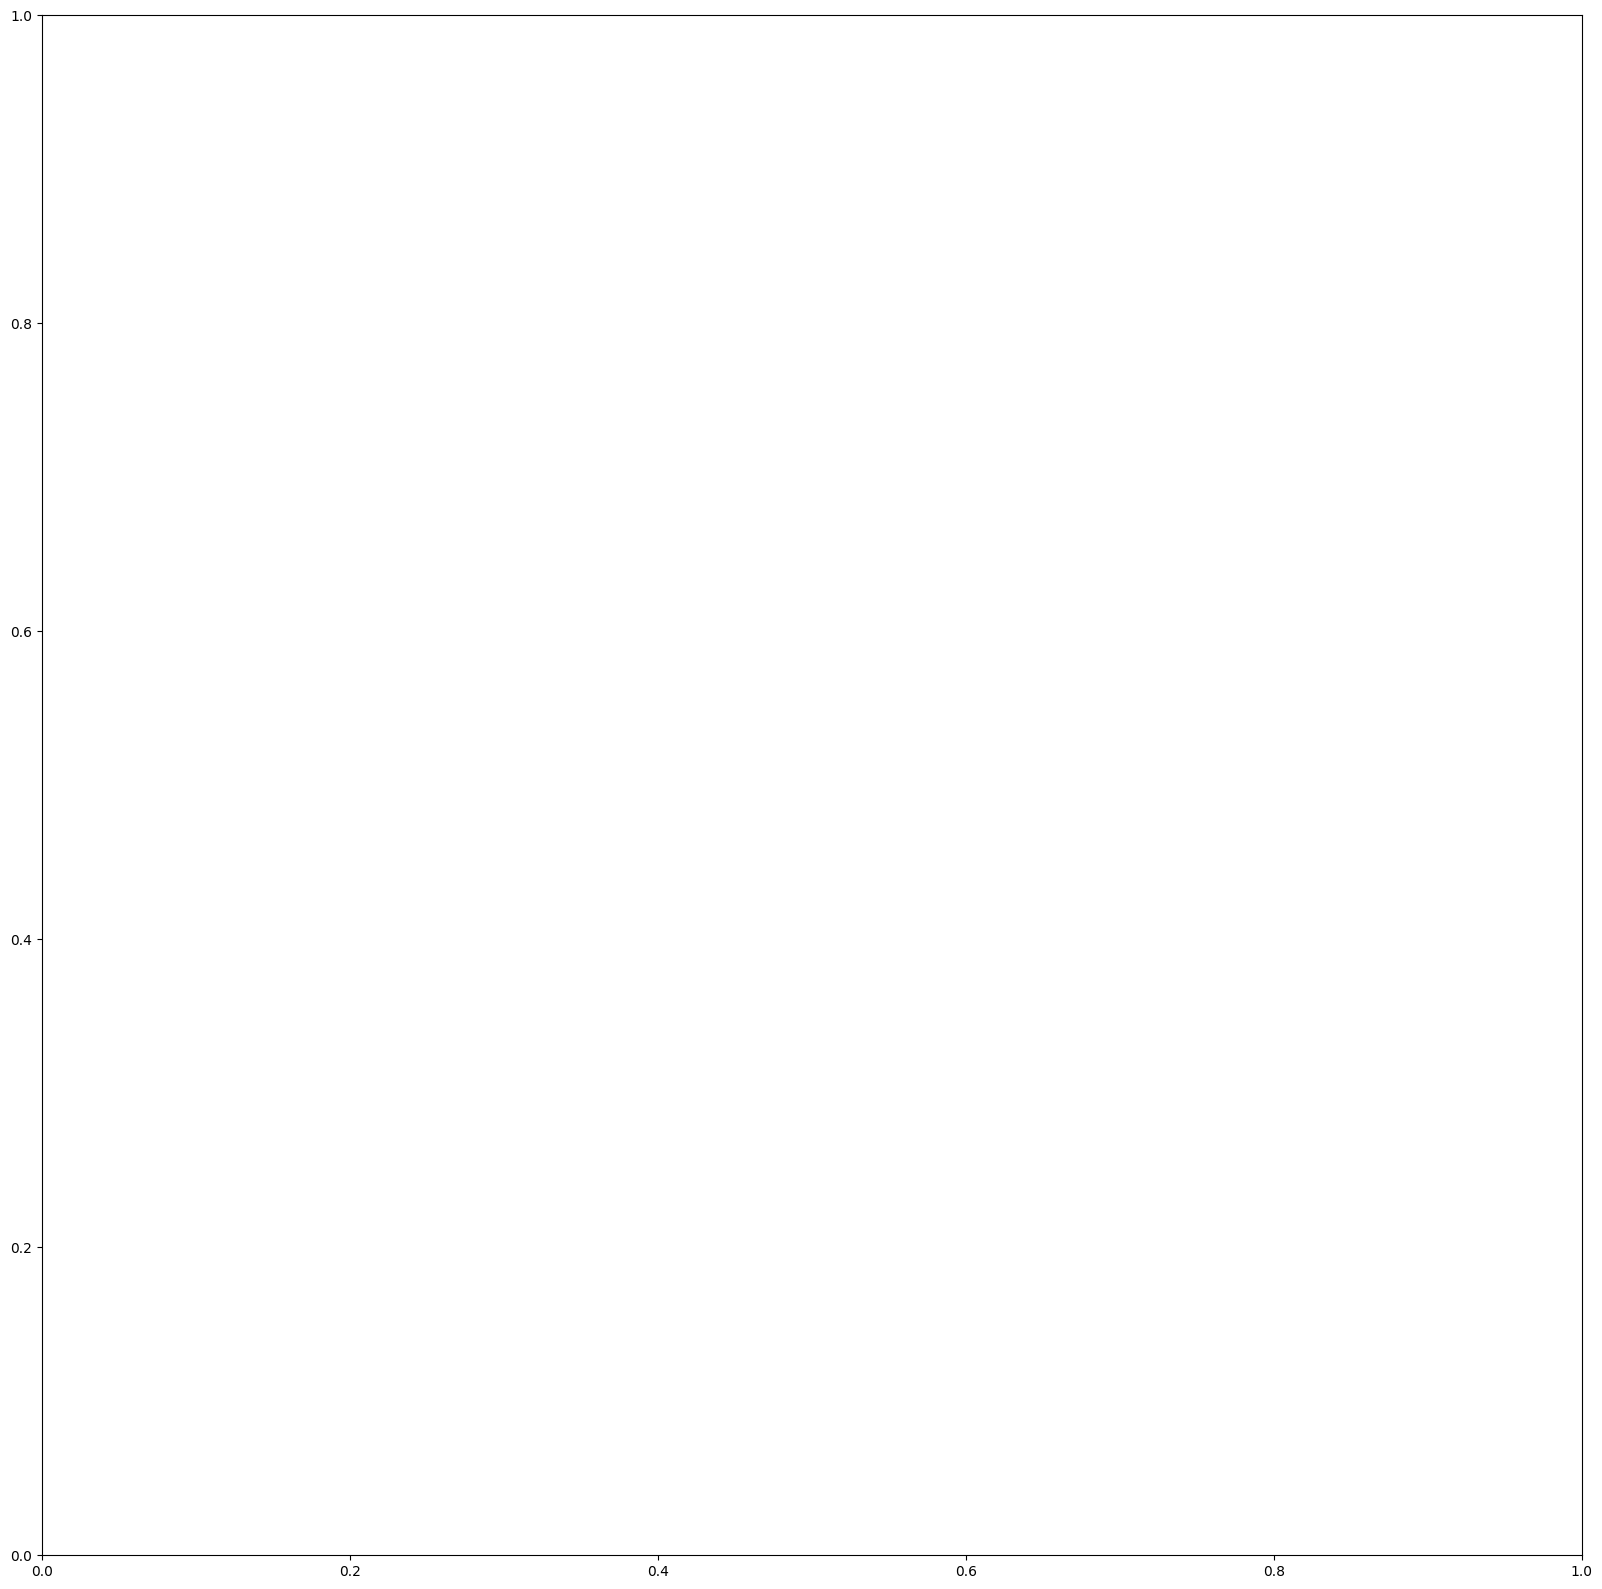

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [ ]:
chars

In [ ]:
labels=[i for i in train_set.class_indices]
print(labels)

In [ ]:
eq=[]
pos=[]
for i in ((chars)):
    if len(eq)==0 and i[0][0] in labels[3:]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[4:14]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[:4]:
        eq.append(i[0][0])
        pos.append(len(eq))
    else:
        pass

In [ ]:
for i in pos:
    if eq[i-1]=='+':
        print(int(''.join(eq[:pos[0]-1]))+int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='%': 
        print(int(''.join(eq[:pos[0]-1]))/int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='*':
        print(int(''.join(eq[:pos[0]-1]))*int(''.join(eq[pos[0]:])))
    else:
        print(int(''.join(eq[:pos[0]-1]))-int(''.join(eq[pos[0]:])))

In [ ]:
image = cv2.imread('./input/data-eqns/test0.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [ ]:
chars

In [ ]:
labels=[i for i in train_set.class_indices]
print(labels)

In [ ]:
eq=[]
pos=[]
for i in ((chars)):
    if len(eq)==0 and i[0][0] in labels[3:]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[4:14]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[:4]:
        eq.append(i[0][0])
        pos.append(len(eq))
    else:
        pass

In [ ]:
for i in pos:
    if eq[i-1]=='+':
        print(int(''.join(eq[:pos[0]-1]))+int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='%': 
        print(int(''.join(eq[:pos[0]-1]))/int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='*':
        print(int(''.join(eq[:pos[0]-1]))*int(''.join(eq[pos[0]:])))
    else:
        print(int(''.join(eq[:pos[0]-1]))-int(''.join(eq[pos[0]:])))